In [1]:
# We'll start by importing the Biopython PDB module, as well as pyplot from matplotlib for plotting
from Bio import PDB as pdb
%matplotlib inline
from matplotlib import pyplot as plt
# We'll also import the mean function only from the statistics module, though we could easily code it ourselves
from statistics import mean

# Let's download the mmCIF-formatted structure from the PDB, and keep track of where it was saved
pdbl = pdb.PDBList()
filename = pdbl.retrieve_pdb_file('1czd')

Structure exists: '/home/kent/cz/1czd.cif' 


In [2]:
# Now let's parse the saved mmCIF file into a Biopython Structure class
mmcifp = pdb.MMCIFParser()
structure_1czd = mmcifp.get_structure('1czd', filename)

# What is this Structure object? What methods can we call? Let's consult its documentation
# Note: single- and double-clicking on the left side of a jupyter notebook output will change how it is shown
help(structure_1czd)

Help on Structure in module Bio.PDB.Structure object:

class Structure(Bio.PDB.Entity.Entity)
 |  Structure(id)
 |  
 |  The Structure class contains a collection of Model instances.
 |  
 |  Method resolution order:
 |      Structure
 |      Bio.PDB.Entity.Entity
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, id)
 |      Initialize the class.
 |  
 |  __repr__(self)
 |      Return the structure identifier.
 |  
 |  get_atoms(self)
 |      Return atoms from residue.
 |  
 |  get_chains(self)
 |      Return chains from models.
 |  
 |  get_models(self)
 |      Return models.
 |  
 |  get_residues(self)
 |      Return residues from chains.
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from Bio.PDB.Entity.Entity:
 |  
 |  __contains__(self, id)
 |      Check if there is a child element with the given id.
 |  
 |  __delitem__(self, id)
 |      Remove a child.
 |  
 |  __eq__(self, other)
 |      Test fo

684
684


Text(0.5, 1.0, 'Isotropic b-factors for C-alpha atoms in 1czd')

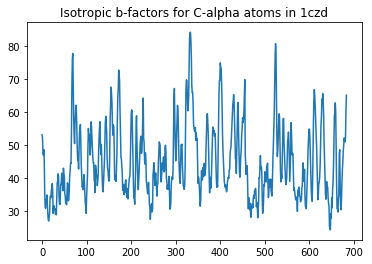

In [3]:
# We can call the get_residues() method of our Structure object to get all residues in all chains in all models
# For example, let's look at the length of a list created from this iterator:
print(len(list(structure_1czd.get_residues())))
# We can then select for the C-alpha atom in each residue, assuming it was correctly named 'CA'
# Note: for structures containing Calcium, we would instead have to select based on the full name including spaces
# Let's look at the length of the list of C-alpha atoms selected in this way:
print(len([residue['CA'] for residue in structure_1czd.get_residues()]))
# Now let's plot the list of b-factors
plt.plot([residue['CA'].get_bfactor() for residue in structure_1czd.get_residues()])
plt.title("Isotropic b-factors for C-alpha atoms in 1czd")
# Note: if we don't pass x values to plt.plot(), it will use the list indices of our y values, starting at 0

Text(0.5, 1.0, 'Isotropic b-factors for C-alpha atoms in 1czd, by chain')

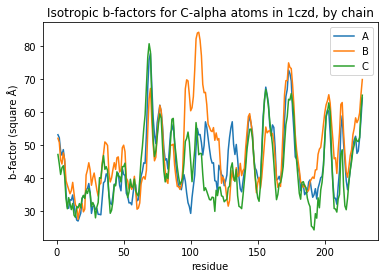

In [4]:
# Let's look at the b-factors by chain, since we know 1czd is a homotrimer
# We'll keep track of the chain IDs to create a legend after they've all been plotted
legendlist = []
# We will iterate through the chains in the structure object
for chain in structure_1czd.get_chains():
    # We'll plot the b-factors as before, but this time provide x values starting at 1
    chainlength = len(list(chain.get_residues()))
    xvalues = range(1, chainlength + 1)
    plt.plot(xvalues, [residue['CA'].get_bfactor() for residue in chain.get_residues()])
    # and add the ID of this  to the end of our list for the legend:
    legendlist.append(chain.get_id())
# Now we'll additionally add legends and axes labels
plt.legend(legendlist)
plt.xlabel("residue")
plt.ylabel("b-factor (square Å)")
plt.title("Isotropic b-factors for C-alpha atoms in 1czd, by chain")

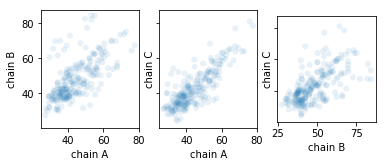

In [5]:
# Let's directly compare b-factors at each position between the 3 chains
numberofchains = len(list(structure_1czd.get_chains()))

# We'll create one subplot for each pair of chains, in 1 row, sharing the y-axis labels
figure, axeslist = plt.subplots(1, numberofchains, sharey = True)
# And create a dummy index to plot once in each position
i = 0
# Plus a list to keep track of the pairs we've already plotted:
pairlist = []

# Let's iterate through all pairs of chains
for chain1 in structure_1czd.get_chains():
    for chain2 in structure_1czd.get_chains():
        i1 = chain1.get_id()
        i2 = chain2.get_id()
        # We'll assume chain IDs are unique to avoid plotting self-pairs
        if i1 != i2 and sorted([i1, i2]) not in pairlist:
            chain1bfactors = [residue['CA'].get_bfactor() for residue in chain1.get_residues()]
            chain2bfactors = [residue['CA'].get_bfactor() for residue in chain2.get_residues()]
            axeslist[i].scatter(chain1bfactors, chain2bfactors, alpha = 0.1, edgecolor = 'none')
            axeslist[i].set_xlabel("chain " + i1)
            axeslist[i].set_ylabel("chain " + i2)
            axeslist[i].set_aspect("equal")
            # Now we'll move to the next plotting position and make sure we don't plot the same pair again
            i += 1
            pairlist.append(sorted([i1,i2]))

Text(0.5, 1.0, 'Isotropic b-factors for backbone atoms in 1czd, by chain')

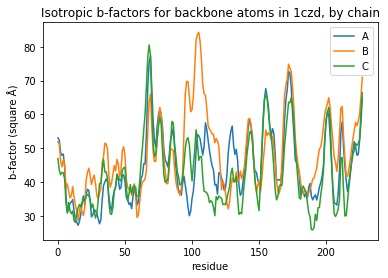

In [6]:
# Finally, let's push list comprehension to its limits and take the mean b-factor
# across the 4 backbone atoms of each residue, then plot by chain as before
legendlist = []

for chain in structure_1czd.get_chains():
    chainlength = len(list(chain.get_residues()))
    xvalues = range(1, chainlength + 1)
    # We'll make a list with the b-factor of all 4 backbone atoms, then take the mean
    # Note: there are even more concise and clever ways to accomplish this with NumPy arrays
    plt.plot([mean([residue['CA'].get_bfactor(),
                    residue['C'].get_bfactor(),
                    residue['N'].get_bfactor(),
                    residue['O'].get_bfactor()])
              for residue in chain.get_residues()])
    legendlist.append(chain.get_id())

plt.legend(legendlist)
plt.xlabel("residue")
plt.ylabel("b-factor (square Å)")
plt.title("Isotropic b-factors for backbone atoms in 1czd, by chain")